In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import requests

url = "https://api.massive.com/v2/aggs/ticker/AAPL/range/1/day/2025-11-03/2025-11-28?adjusted=true&sort=asc&limit=120&apiKey=n4I7yVhjpZJigqZVkpxXwtmwyNVans3W"    # Daha önce bulduğunuz URL ile değiştirin
api_data = requests.get(url).json()

In [10]:
api_data

{'ticker': 'AAPL',
 'queryCount': 19,
 'resultsCount': 19,
 'adjusted': True,
 'results': [{'v': 50194583.0,
   'vw': 268.2996,
   'o': 270.42,
   'c': 269.05,
   'h': 270.85,
   'l': 266.25,
   't': 1762146000000,
   'n': 731851},
  {'v': 49274846.0,
   'vw': 269.7485,
   'o': 268.325,
   'c': 270.04,
   'h': 271.486,
   'l': 267.615,
   't': 1762232400000,
   'n': 713303},
  {'v': 43683072.0,
   'vw': 269.8162,
   'o': 268.61,
   'c': 270.14,
   'h': 271.7,
   'l': 266.93,
   't': 1762318800000,
   'n': 588621},
  {'v': 51204045.0,
   'vw': 270.7137,
   'o': 267.89,
   'c': 269.77,
   'h': 273.4,
   'l': 267.89,
   't': 1762405200000,
   'n': 718679},
  {'v': 48227365.0,
   'vw': 269.0051,
   'o': 269.795,
   'c': 268.47,
   'h': 272.29,
   'l': 266.77,
   't': 1762491600000,
   'n': 754451},
  {'v': 41312412.0,
   'vw': 270.0586,
   'o': 268.96,
   'c': 269.43,
   'h': 273.73,
   'l': 267.455,
   't': 1762750800000,
   'n': 675207},
  {'v': 46208318.0,
   'vw': 274.0647,
   'o': 269

In [17]:
apple_df = pd.DataFrame(api_data['results'])


In [12]:
apple_df.head()

,v,vw,o,c,h,l,t,n
0,50194583.0,268.2996,270.420,269.05,270.850,266.250,1762146000000,731851
1,49274846.0,269.7485,268.325,270.04,271.486,267.615,1762232400000,713303
2,43683072.0,269.8162,268.610,270.14,271.700,266.930,1762318800000,588621
3,51204045.0,270.7137,267.890,269.77,273.400,267.890,1762405200000,718679
4,48227365.0,269.0051,269.795,268.47,272.290,266.770,1762491600000,754451


In [18]:
apple_df['t'] = pd.to_datetime(apple_df['t'], origin='unix', unit='ms')

In [19]:
apple_df = apple_df.set_index('t')

In [30]:
apple_df.index.names = ['date']

In [28]:
apple_df.head()

,volume,avg_price,open,close,high,low,number
Date,,,,,,,
2025-11-03 05:00:00,50194583.0,268.2996,270.420,269.05,270.850,266.250,731851
2025-11-04 05:00:00,49274846.0,269.7485,268.325,270.04,271.486,267.615,713303
2025-11-05 05:00:00,43683072.0,269.8162,268.610,270.14,271.700,266.930,588621
2025-11-06 05:00:00,51204045.0,270.7137,267.890,269.77,273.400,267.890,718679
2025-11-07 05:00:00,48227365.0,269.0051,269.795,268.47,272.290,266.770,754451


In [22]:
col_mapping = { 'o': 'open', 'c': 'close', 'h': 'high', 'l': 'low', 'n': 'number', 'v': 'volume', 'vw': 'avg_price' } 
apple_df = apple_df.rename(columns=col_mapping)

<Axes: xlabel='t'>

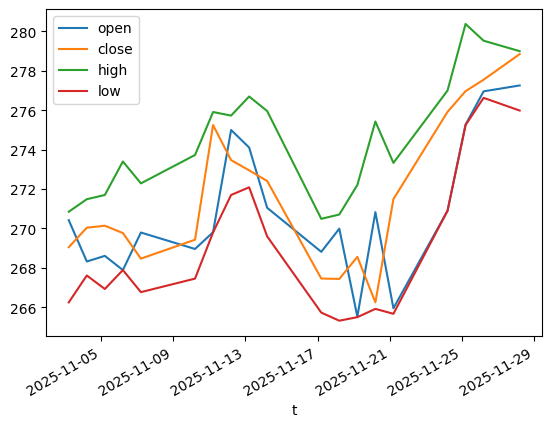

In [23]:
apple_df[['open', 'close', 'high', 'low']].plot()

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/scorp08/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/scorp08/workintech_projeler/data-stock-market/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.58s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master

